# Set up and file download

In [38]:
! pip install kaggle # needed to use the kaggle commands to download the data directly from the website

In [39]:
import pandas as pd
import numpy as np
import kagglehub
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy.random import seed
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statistics as stat

In [40]:
# download the kaggle dataset online without having to download the file.

# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset


In [41]:
! ls /kaggle/input/diabetes-health-indicators-dataset

diabetes_012_health_indicators_BRFSS2015.csv
diabetes_binary_5050split_health_indicators_BRFSS2015.csv
diabetes_binary_health_indicators_BRFSS2015.csv


Definitions from [kaggle website](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data) for each .csv file definition.

1. **diabetes _ 012 _ health _ indicators _ BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables
1. **diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv** is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.
1. **diabetes _ binary _ health _ indicators _ BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

For this analysis we will be using the `diabetes _ binary _ health _ indicators _ BRFSS2015.csv`

## Column Details
Diabetes_binary
- 0 = no diabetes
- 1 = prediabetes 2 = diabete

HighBP
- 0 = no high BP
- 1 = high BP

HighChol
- 0 = no high cholesterol
- 1 = high cholesterol

CholCheck
- 0 = no cholesterol check in 5 years
- 1 = yes cholesterol check in 5 years

BMI (Body Mass Index)
- Uses the BMI scale
- Referance using [NHLBI Website](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm)

Smoker
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
- 0 = no
- 1 = yes

Stroke
(Ever told) you had a stroke.
- 0 = no
- 1 = yes

HeartDiseaseorAttack
coronary heart disease (CHD) or myocardial infarction (MI)
- 0 = no
- 1 = yes

PhysActivity  
physical activity in past 30 days - not including job
- 0 = no
- 1 = yes

Fruits
Consume Fruit 1 or more times per day
- 0 = no
- 1 = yes

Veggies
Consume Vegetables 1 or more times per day
- 0 = no
- 1 = yes

HvyAlcoholConsump
(adult men >=14 drinks per week and adult women>=7 drinks per week)
- 0 = no
- 1 = yes

AnyHealthcare
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
- 0 = no
- 1 = yes

NoDocbcCost
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
- 0 = no
- 1 = yes

GenHlth
Would you say that in general your health is: scale 1-5
- 1 = excellent
- 2 = very good
- 3 = good
- 4 = fair
- 5 = poor

MentHlth
days of poor mental health scale 1-30 days
- Data in amount of days

PhysHlth
physical illness or injury days in past 30 days scale 1-30
- Data in amount of days

DiffWalk
Do you have serious difficulty walking or climbing stairs?
- 0 = no
- 1 = yes

Sex
- 0 = female
- 1 = male

Age
13-level age category (_AGEG5YR see codebook)
- 1 = 18-24
- 9 = 60-64
- 13 = 80 or older

Education
Education level (EDUCA see codebook) scale 1-6
- 1 = Never attended school or only kindergarten
- 2 = elementary etc.

Income
Income scale (INCOME2 see codebook) scale 1-8   
- 1 = less than $10,000  

- 5 = less than $35,000   

- 8 = $75,000 or more  

In [42]:
# For this analysis we will be using the
# `diabetes _ binary _ health _ indicators _ BRFSS2015.csv` dataset
csv_path = '/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv'
df = pd.read_csv(csv_path)

# converting from float to integers
for column in df.columns:
  df[column] = df[column].astype(int)

In [43]:
df.value_counts('Diabetes_binary')

,count
Diabetes_binary,
0,218334
1,35346


In [44]:
## see all values for df
exclude_list = ['Date', 'Person_ID', 'Sleep Start Time', 'Sleep End Time']
for column in df.columns:
    if column in exclude_list:
        pass
    else:
      ur = df[column].unique()
      ur = sorted(ur)
      print(f'{column}: {ur}')

# everything looks good so far! - JU 4/28/2025

Diabetes_binary: [np.int64(0), np.int64(1)]
HighBP: [np.int64(0), np.int64(1)]
HighChol: [np.int64(0), np.int64(1)]
CholCheck: [np.int64(0), np.int64(1)]
BMI: [np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), 

In [45]:
print(df.isnull().sum()) # count of all
# everything looks good to me! -JU 4/28/2025

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [46]:
# means and standard deviation of each column
for column in df.columns:
    print(f'{column}:')
    print(f'Mean = {df[column].mean()}                 STD = {df[column].std()}')
    print()

Diabetes_binary:
Mean = 0.13933301797540207                 STD = 0.34629438458901085

HighBP:
Mean = 0.4290011037527594                 STD = 0.4949344626904692

HighChol:
Mean = 0.4241209397666351                 STD = 0.4942098046566831

CholCheck:
Mean = 0.9626695048880479                 STD = 0.18957075436257245

BMI:
Mean = 28.382363607694735                 STD = 6.608694201404477

Smoker:
Mean = 0.44316855881425415                 STD = 0.4967606667792389

Stroke:
Mean = 0.04057079785556607                 STD = 0.19729409939998502

HeartDiseaseorAttack:
Mean = 0.09418558814254178                 STD = 0.29208731475040395

PhysActivity:
Mean = 0.7565436770734784                 STD = 0.42916904339729167

Fruits:
Mean = 0.6342557552822453                 STD = 0.481639187171053

Veggies:
Mean = 0.811419899085462                 STD = 0.3911754716844546

HvyAlcoholConsump:
Mean = 0.05619678334910123                 STD = 0.23030178889464067

AnyHealthcare:
Mean = 0.9510525070955

In [47]:
# train-test split
# 80% train, 20% test
##### note for future johnny
# - might play around and figure out which features I can remove based on preliminary values.
## Will return back to this later
X = df.drop('Diabetes_binary', axis=1) # figure out which features I want to keep for the final run -JU
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Here we will normalize data using scalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# creating the neural network model
## will play along with more layers later -JU 5/6/2025
## Not sure what was the best method, so I just started with 64 and halved it until I got to one.
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #input layer
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid') # output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Link to keras optimizer documentation [spellbook](https://keras.io/api/optimizers/)

In [50]:
# Compile the model
## will play along with different optimizer later -JU 5/6/2025
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.compile(optimizer='adam', loss='mean_squared_error')

In [51]:
# Train the model - this will take forever
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - loss: 0.1104 - val_loss: 0.0978
Epoch 2/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.0979 - val_loss: 0.0971
Epoch 3/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0972 - val_loss: 0.0970
Epoch 4/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0973 - val_loss: 0.0968
Epoch 5/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.0965 - val_loss: 0.0970
Epoch 6/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0961 - val_loss: 0.0969
Epoch 7/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0970 - val_loss: 0.0969
Epoch 8/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.0971 - val_loss: 0.0968
Epoch 9/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.0964 - val_loss: 0.0970
Epoch 10/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.0969 - val_loss: 0.0970
Epoch 11/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0961 - val_loss: 0.0970
Epoch 12/20
5074/50

In [52]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0958
Mean Squared Error on Test Set: 0.09621892869472504


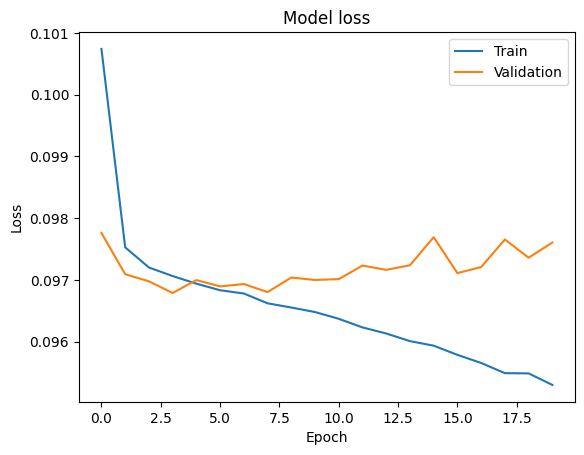

In [53]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()